In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset

In [67]:
df = pd.read_csv('adult(cleaned).csv')

### Metrics 

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### Train test Split

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x = df.drop('income', axis=1)
y = df[['income']]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y)

### Importing the classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

### Basic Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

accuracy : 0.7977733321736105
recall : 0.614926419060967
precision : 0.5887286145588728
f1 : 0.6015424164524421
confusion matrix: [[7417 1226]
 [1099 1755]]


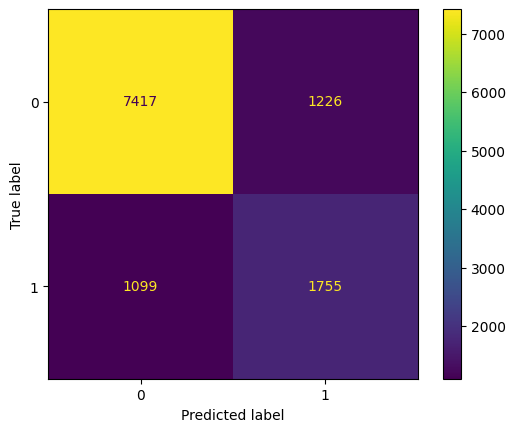

In [38]:
metrics(y_test, y_pred)

### Training with normalized dataset

In [64]:
DecTree = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=10, 
                                 min_samples_leaf=10, 
                                 min_samples_split=5, 
                                 splitter='random')
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

accuracy : 0.8420457510654954
recall : 0.5490539593552908
precision : 0.7476145038167938
f1 : 0.6331313131313131
confusion matrix: [[8114  529]
 [1287 1567]]


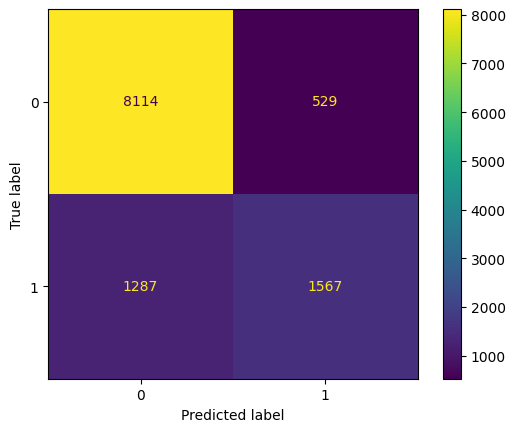

In [65]:
metrics(y_test, y_pred)

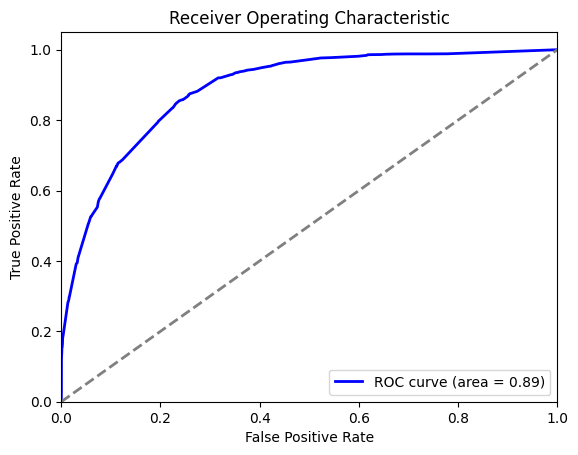

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = DecTree.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Using SMOTE to improve recall

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

accuracy : 0.7887274941289032
recall : 0.8241065171688857
precision : 0.5496611357793877
f1 : 0.6594700686947988
confusion matrix: [[6716 1927]
 [ 502 2352]]


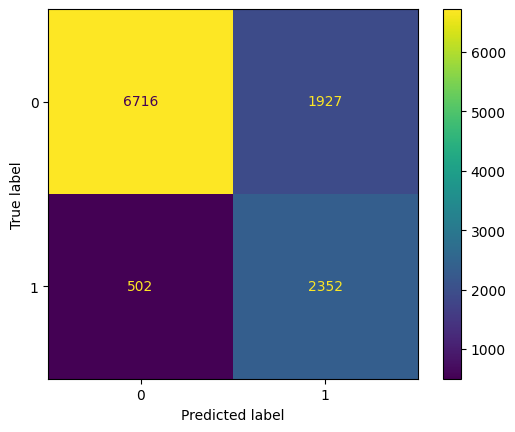

In [85]:
DecTree = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=10, 
                                 min_samples_leaf=10, 
                                 min_samples_split=5, 
                                 splitter='random')
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)
metrics(y_test, y_pred)

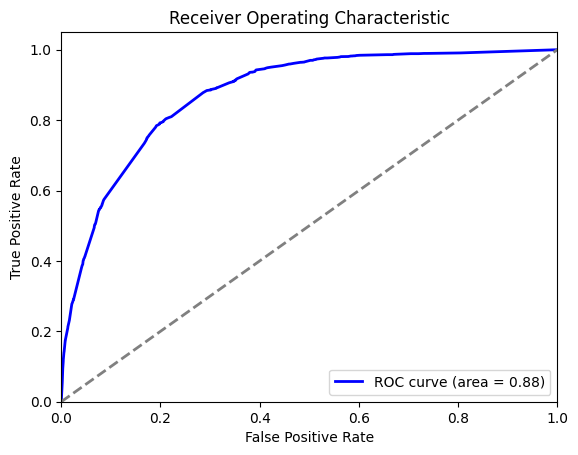

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = DecTree.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Training with non normalized dataset

In [45]:
df_non_normalized = pd.read_csv('adult(cleaned non normalized).csv')

In [46]:
x = df_non_normalized.drop('income', axis=1)
y = df_non_normalized[['income']]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y)

In [48]:
DecTreeNonNormalized = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=10, min_samples_split=10, splitter='random')

In [49]:
DecTreeNonNormalized.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       splitter='random')

In [50]:
y_pred = DecTreeNonNormalized.predict(x_test)

accuracy : 0.8004063914288353
recall : 0.4786483475677683
precision : 0.6300097751710655
f1 : 0.543996623760287
confusion matrix: [[7377  757]
 [1404 1289]]


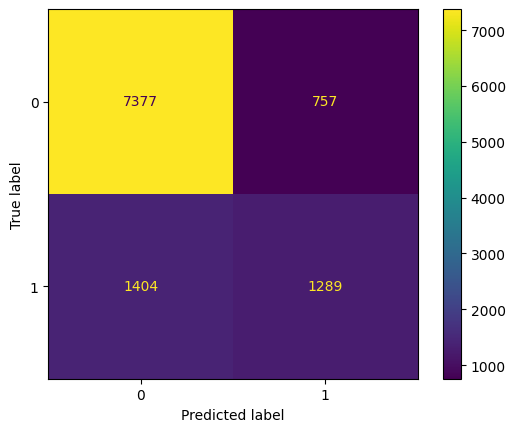

In [51]:
metrics(y_test, y_pred)

### Tuned for recall

In [52]:
DecTree = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=50, 
                                 min_samples_leaf=10, 
                                 min_samples_split=5, 
                                 splitter='random')
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

accuracy : 0.7957883070102522
recall : 0.5116969922020052
precision : 0.6059806508355321
f1 : 0.5548620897926314
confusion matrix: [[7238  896]
 [1315 1378]]


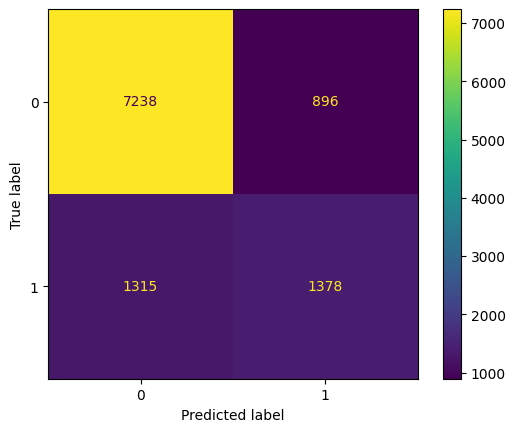

In [53]:
metrics(y_test,y_pred)

### HyperParameter Tuning

In [54]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

from sklearn.model_selection import GridSearchCV

#Find Best K based on accuracy

grid_kn=GridSearchCV(estimator=DecTree,#model
                     param_grid=param_grid, #params
                    scoring='recall',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 5, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu 
                    )
grid_kn.fit(x_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=50,
                                              min_samples_leaf=10,
                                              min_samples_split=5,
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=1)

In [55]:
grid_kn.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'splitter': 'random'}